# Import Dependencies

In [31]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import os
import json
import requests

# clean_fl_ccd_directory DataFrame

In [32]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/directory/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_directory_response = requests.get(query_url)
fl_ccd_directory_data = fl_ccd_directory_response.json()

# Establish the results from the request to loop through below
results_directory = fl_ccd_directory_data['results']

# Create Lists to store values for the columns
district_name = []
dir_nces_id = []
state_id = []
latitude = []
longitude = []
urban_locale = []
agency_type = []
total_schools = []
total_students = []
spec_ed_stud = []
eng_lang_stud = []
teachers_fte = []
instru_aids_fte = []
guidance_cons_fte = []
school_staff_fte = []
district_staff_fte = []
staff_total_fte = []

# Loop through results and store values in appropriate lists
for result in results_directory:
    district_name.append(result['lea_name'])
    dir_nces_id.append(result['leaid'])
    state_id.append(result['state_leaid'])
    latitude.append(result['latitude'])
    longitude.append(result['longitude'])
    urban_locale.append(result['urban_centric_locale'])
    agency_type.append(result['agency_type'])
    total_schools.append(result['number_of_schools'])
    total_students.append(result['enrollment'])
    spec_ed_stud.append(result['spec_ed_students'])
    eng_lang_stud.append(result['english_language_learners'])
    teachers_fte.append(result['teachers_total_fte'])
    instru_aids_fte.append(result['instructional_aides_fte'])
    guidance_cons_fte.append(result['guidance_counselors_total_fte'])
    school_staff_fte.append(result['school_staff_total_fte'])
    district_staff_fte.append(result['lea_staff_total_fte'])
    staff_total_fte.append(result['staff_total_fte'])
    
# Create dataframe from results
fl_ccd_directory = pd.DataFrame({"District Name":district_name, "NCES ID":dir_nces_id, "State ID":state_id,                          
                                 "Degree of urbanization":urban_locale, "Agency Type":agency_type,
                                "Total Schools":total_schools, "Total Students Enrolled":total_students,
                                "Special Ed Students":spec_ed_stud, "English Language Students":eng_lang_stud,
                                "Total FTE Teachers":teachers_fte, "Total FTE Instructional Aids": instru_aids_fte,
                                "Total FTE Guidance Counselors": guidance_cons_fte, "Total FTE School Staff":school_staff_fte,
                                "Total FTE District Staff": district_staff_fte, "Total FTE Staff": staff_total_fte,
                                 "Latitude":latitude, "Longitude":longitude})

# Remove all districts that are not regular local school district
clean_fl_ccd_directory = fl_ccd_directory.loc[fl_ccd_directory['Agency Type'] == 1]


# Format columns
# clean_fl_ccd_directory = clean_fl_ccd_directory.style.format({"Total Students Enrolled": "{:,}" , "Special Ed Students": "{:,}",
#                                                             "English Language Students":"{:,}"})

clean_fl_ccd_directory

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,Total FTE Instructional Aids,Total FTE Guidance Counselors,Total FTE School Staff,Total FTE District Staff,Total FTE Staff,Latitude,Longitude
2,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,535,61,None,None,4249,29.652601,-82.318977
3,BAKER,1200060,02,32,1,9,4936,538,11,301,65,10,None,None,604,30.277151,-82.118149
5,BAY,1200090,03,22,1,51,27641,4575,567,1844,732,66,None,None,3735,30.172516,-85.675934
6,BRADFORD,1200120,04,32,1,12,3199,645,6,242,56,8,None,None,507,29.951584,-82.112663
7,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,791,183,None,None,9109,28.248600,-80.736115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,UNION,1201890,63,32,1,9,2384,387,0,175,32,6,None,None,343,30.017477,-82.338341
66,VOLUSIA,1201920,64,21,1,92,61777,9879,3479,4153,593,142,None,None,7586,29.030180,-81.308472
67,WAKULLA,1201950,65,42,1,15,5141,976,8,327,84,9,None,None,708,30.176279,-84.379211
68,WALTON,1201980,66,41,1,23,8435,799,300,569,99,18,None,None,1164,30.720671,-86.098549


# drop_ids District Name List

In [33]:
# Create a list of district names that were not regular local schools to drop from other tables
drop_agencies = fl_ccd_directory[fl_ccd_directory['Agency Type'] != 1]
drop_ids = drop_agencies['District Name'].tolist()

drop_ids

['FL VIRTUAL',
 'CESA',
 'LAKE WALES CHARTER SCHOOLS',
 'WASH SPECIAL',
 'FAU LAB SCH',
 'FSU LAB SCH',
 'FAMU LAB SCH',
 'UF LAB SCH',
 'DEAF/BLIND']

# fl_saipe_poverity DataFrame

In [34]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/saipe/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_saipe_poverty_response = requests.get(query_url)
fl_saipe_poverty_data = fl_saipe_poverty_response.json()

# Establish the results from the request to loop through below
results_poverity = fl_saipe_poverty_data['results']

# Create Lists to store values for the columns
pov_nces_id = []
est_pop_total = []
est_pop_5to17 = []
est_pop_5to17_perc = []
est_pop_5to17_poverity = []
est_pop_5to17_poverity_perc = []


# Loop through results and store values in appropriate lists
for result in results_poverity:
    pov_nces_id.append(result['leaid'])
    est_pop_total.append(result['est_population_total'])
    est_pop_5to17.append(result['est_population_5_17'])
    est_pop_5to17_perc.append(result['est_population_5_17_pct'])
    est_pop_5to17_poverity.append(result['est_population_5_17_poverty'])
    est_pop_5to17_poverity_perc.append(result['est_population_5_17_poverty_pct'])

    
# Create dataframe from results
fl_saipe_poverity = pd.DataFrame({"NCES ID":pov_nces_id, "Estimated Total Population":est_pop_total, 
                                 "Estimated Total Population Ages 5–17":est_pop_5to17,                        
                                 "Share of Population that are school ages 5–17":est_pop_5to17_perc, 
                                 "Estimated Population Ages 5–17 in poverity":est_pop_5to17_poverity,
                                "Share of School-Age Population (5–17) in poverity":est_pop_5to17_poverity_perc})

# Format columns
# clean_fl_saipe_poverity = fl_saipe_poverity.style.format({"Estimated Total Population":"{:,.0f}", 
#                                                          "Estimated Total Population Ages 5–17":"{:,.0f}",                        
#                                                          "Share of Population that are school ages 5–17":"{:.2%}", 
#                                                          "Estimated Population Ages 5–17 in poverity":"{:,.0f}",
#                                                          "Share of School-Age Population (5–17) in poverity":"{:.2%}"
#                                                         })

fl_saipe_poverity

,NCES ID,Estimated Total Population,Estimated Total Population Ages 5–17,Share of Population that are school ages 5–17,Estimated Population Ages 5–17 in poverity,Share of School-Age Population (5–17) in poverity
0,1200030,256380.0,32012.0,0.124862,6438.0,0.201112
1,1200060,27093.0,5004.0,0.184697,1146.0,0.229017
2,1200090,178985.0,27626.0,0.154348,5939.0,0.214979
3,1200120,26702.0,3847.0,0.144072,1047.0,0.272160
4,1200150,556885.0,78183.0,0.140393,15431.0,0.197370
...,...,...,...,...,...,...
62,1201890,15190.0,2125.0,0.139895,510.0,0.240000
63,1201920,507531.0,67908.0,0.133801,16530.0,0.243418
64,1201950,31432.0,4887.0,0.155478,926.0,0.189482
65,1201980,61530.0,9060.0,0.147245,2256.0,0.249007


# Financial DataFrame

In [35]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/finance/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_finance_response = requests.get(query_url)
fl_ccd_finance_data = fl_ccd_finance_response.json()

# Establish the results from the request to loop through below
results_financial = fl_ccd_finance_data['results']

# Create Lists to store values for the columns
fin_nces_id = []
total_rev = []
fed_total_rev = []
st_total_rev = []
loc_total_rev = []
loc_prop_tax_rev = []
intruct_staff_exp = []
general_admin_exp = []
school_admin_exp = []
operation_plant_exp = []
student_transport_exp = []

# Loop through results and store values in appropriate lists
for result in results_financial:
    fin_nces_id.append(result['leaid'])
    total_rev.append(result['rev_total'])
    fed_total_rev.append(result['rev_fed_total'])
    st_total_rev.append(result['rev_state_total'])
    loc_total_rev.append(result['rev_local_total'])
    loc_prop_tax_rev.append(result['rev_local_prop_tax'])
    intruct_staff_exp.append(result['exp_current_instruc_staff'])
    general_admin_exp.append(result['exp_current_general_admin'])
    school_admin_exp.append(result['exp_current_sch_admin'])
    operation_plant_exp.append(result['exp_current_operation_plant'])
    student_transport_exp.append(result['exp_current_student_transport'])
    
# Create dataframe from results
fl_ccd_financial = pd.DataFrame({"NCES ID":fin_nces_id, "Total Revenue":total_rev, "Total Federal Revenue":fed_total_rev,                        
                                 "Total State Revenue":st_total_rev, "Total Local Revenue":loc_total_rev,
                                "Local Revenue (Property Tax)":loc_prop_tax_rev, "Total Expense for Instruction Staff":intruct_staff_exp,
                                "Total Expense for General Admin":general_admin_exp, "Total Expense for School Admin":school_admin_exp,
                                "Total Expense for Operations":operation_plant_exp, "Total Expense for Student Transportation":student_transport_exp})

# Remove all districts without financial data
clean_fl_ccd_financial = fl_ccd_financial.loc[fl_ccd_financial['Total Revenue'] > 0]

clean_fl_ccd_financial

,NCES ID,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
2,1200030,272451000.0,34881000.0,119810000.0,117760000,103083000,21763000,3041000,13128000,29535000,11174000
3,1200060,42674000.0,4704000.0,29197000.0,8773000,6266000,2595000,732000,2007000,4385000,2613000
5,1200090,268131000.0,26772000.0,103527000.0,137832000,101316000,11183000,2045000,13550000,20567000,8132000
6,1200120,31053000.0,4941000.0,17021000.0,9091000,6476000,1490000,734000,1792000,3197000,1629000
7,1200150,673236000.0,76493000.0,320008000.0,276735000,221801000,49626000,5282000,36220000,55676000,17750000
...,...,...,...,...,...,...,...,...,...,...,...
65,1201890,21137000.0,2718000.0,15149000.0,3270000,1814000,1348000,674000,853000,2083000,706000
66,1201920,595156000.0,69002000.0,255682000.0,270472000,203540000,37538000,4455000,36135000,50429000,16515000
67,1201950,44700000.0,4754000.0,28484000.0,11462000,9449000,1768000,1243000,2650000,5404000,2823000
68,1201980,101614000.0,8332000.0,16320000.0,76962000,70781000,5280000,1007000,5026000,9890000,4787000


# fl_nces_combined DataFrame

In [36]:
# Combined all above API calls in to one dataframe to match with District Name

dem_pov_nces_combined = pd.merge(clean_fl_ccd_directory,fl_saipe_poverity, on="NCES ID")
fl_nces_combined = pd.merge(dem_pov_nces_combined,clean_fl_ccd_financial, on="NCES ID")
fl_nces_combined

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,...,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
0,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,...,272451000.0,34881000.0,119810000.0,117760000,103083000,21763000,3041000,13128000,29535000,11174000
1,BAKER,1200060,02,32,1,9,4936,538,11,301,...,42674000.0,4704000.0,29197000.0,8773000,6266000,2595000,732000,2007000,4385000,2613000
2,BAY,1200090,03,22,1,51,27641,4575,567,1844,...,268131000.0,26772000.0,103527000.0,137832000,101316000,11183000,2045000,13550000,20567000,8132000
3,BRADFORD,1200120,04,32,1,12,3199,645,6,242,...,31053000.0,4941000.0,17021000.0,9091000,6476000,1490000,734000,1792000,3197000,1629000
4,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,...,673236000.0,76493000.0,320008000.0,276735000,221801000,49626000,5282000,36220000,55676000,17750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,UNION,1201890,63,32,1,9,2384,387,0,175,...,21137000.0,2718000.0,15149000.0,3270000,1814000,1348000,674000,853000,2083000,706000
63,VOLUSIA,1201920,64,21,1,92,61777,9879,3479,4153,...,595156000.0,69002000.0,255682000.0,270472000,203540000,37538000,4455000,36135000,50429000,16515000
64,WAKULLA,1201950,65,42,1,15,5141,976,8,327,...,44700000.0,4754000.0,28484000.0,11462000,9449000,1768000,1243000,2650000,5404000,2823000
65,WALTON,1201980,66,41,1,23,8435,799,300,569,...,101614000.0,8332000.0,16320000.0,76962000,70781000,5280000,1007000,5026000,9890000,4787000


# 21+ Absent Data

In [37]:
# Read in Florida District 21+ Absents Data
fl_2014_21absents_path = "fldoe_data/2014_FL_21absents.xlsx"
fl_2014_21absents_data = pd.read_excel(os.path.join(fl_2014_21absents_path), header=2)

# Remove all district names that were dropped due to not local school district
clean_fl_2014_21absents=fl_2014_21absents_data[~fl_2014_21absents_data["District Name"].isin(drop_ids)]

clean_fl_2014_21absents

,District #,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days
0,0,FLORIDA,3111840,303913,0.097663
1,1,ALACHUA,32688,3101,0.094867
2,2,BAKER,5377,1005,0.186907
3,3,BAY,32074,4095,0.127674
4,4,BRADFORD,3820,703,0.184031
...,...,...,...,...,...
62,63,UNION,2644,465,0.175870
63,64,VOLUSIA,70784,7841,0.110774
64,65,WAKULLA,5615,989,0.176135
65,66,WALTON,9621,723,0.075148


# Dropout Data

In [212]:
# Read in Florida District Dropout Data
fl_2014_dropout_path = "fldoe_data/2014_FL_dropout_rates.xls"
fl_2014_dropout_data = pd.read_excel(os.path.join(fl_2014_dropout_path),header=4)

# Remove all district names that were dropped due to not local school district and state total
clean_fl_2014_dropout=fl_2014_dropout_data[~fl_2014_dropout_data["District Name"].isin(drop_ids)]
clean_fl_2014_dropout = clean_fl_2014_dropout.loc[clean_fl_2014_dropout['District Name'] != "FLORIDA"]

clean_fl_2014_dropout

pd.set_option("display.max_rows", None, "display.max_columns", None)

clean_fl_2014_dropout

white = clean_fl_2014_dropout["White Dropouts (numerator)"]
black = clean_fl_2014_dropout["Black Dropouts (numerator)"]
hispanic = clean_fl_2014_dropout["Hispanic Dropouts (numerator)"]
asain = clean_fl_2014_dropout["Asian Dropouts (numerator)"]
pacific_islander = clean_fl_2014_dropout["Pacific Islander Dropouts (numerator)"]
american_indian = clean_fl_2014_dropout["American Indian Dropouts (numerator)"]
two_or_more_races = clean_fl_2014_dropout["Two or More Races Dropouts (numerator)"]
total_dropouts = clean_fl_2014_dropout["Total Dropouts (numerator)"]
district_name = clean_fl_2014_dropout["District Name"]

dropouts = pd.DataFrame({"District Name":district_name, "White Total Dropouts":white, "Black or African American Total Dropouts":black, 
                         "Hispanic or Latino Total Dropouts":hispanic, "Asian Total Dropouts":asain, 
                         "Native Hawaiian or Other Pacific Islander Total Dropouts": pacific_islander, 
                         "American Indian or Alaska Native Total Dropouts":american_indian, 
                         "Two or More Races Dropouts":two_or_more_races, "Total Dropouts":total_dropouts})

dropouts

,District Name,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts
1,ALACHUA,58,174,17,1,*,1,14,265
2,BAKER,13,0,0,*,*,*,0,13
3,BAY,65,16,8,2,*,0,4,95
4,BRADFORD,2,4,0,*,*,*,0,6
5,BREVARD,101,48,26,1,0,0,15,191
6,BROWARD,235,754,235,16,1,4,15,1260
7,CALHOUN,11,2,1,0,0,*,1,16
8,CHARLOTTE,165,20,23,1,*,0,4,213
9,CITRUS,63,6,5,0,*,0,4,79
10,CLAY,97,27,2,0,0,0,5,131


# District Demographic Membership Data

In [134]:
# Read in Florida District Demographic Data
fl_2014_demographics_path = "fldoe_data/2014_FL_membership_demographics.xls"
fl_2014_demographics_data = pd.read_excel(os.path.join(fl_2014_demographics_path), sheet_name = "DISTRICT", header=4)

# Remove all district names that were dropped due to not local school district and only selct rows for district totals
clean_fl_2014_demographics=fl_2014_demographics_data[~fl_2014_demographics_data["District"].isin(drop_ids)]
clean_fl_2014_demographics = clean_fl_2014_demographics.loc[clean_fl_2014_demographics['Grade'] == "TOTAL"]

rename_demographics = clean_fl_2014_demographics.rename(columns={"District": "District Name"})

# clean_fl_2014_demographics
rename_demographics

,District #,District Name,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races,Female Total,Male Total,Total
14,1,ALACHUA,TOTAL,12837,10177,2483,1370,28,55,1726,14040,14636,28676
29,2,BAKER,TOTAL,4096,572,92,20,2,14,141,2383,2554,4937
44,3,BAY,TOTAL,19231,4229,1818,580,37,118,1548,13435,14126,27561
59,4,BRADFORD,TOTAL,2269,727,67,25,12,6,80,1533,1653,3186
74,5,BREVARD,TOTAL,45137,10607,9727,1508,92,166,5042,35062,37217,72279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,63,UNION,TOTAL,1852,332,87,5,3,6,99,1170,1214,2384
959,64,VOLUSIA,TOTAL,36880,9627,11405,1160,72,175,2457,29931,31845,61776
974,65,WAKULLA,TOTAL,4168,542,150,28,4,14,235,2431,2710,5141
989,66,WALTON,TOTAL,6525,532,856,73,7,27,417,4028,4409,8437


# Free and Reduced Lunches Data

In [201]:
# Read in Florida District Free and Reduced Lunch Data - specific sheet read is the latest survey for the year
#2014-15 SURVEY 3 PRELIMINARY DATA (as of 5/5/2015)
fl_2014_lunch_path = "fldoe_data/2014_FL_lunch_status.xlsx"
fl_2014_lunch_data = pd.read_excel(os.path.join(fl_2014_lunch_path), sheet_name = "Demo Preliminary Survey 3-Dist",
                                  header=4)

# Remove all district names that were dropped due to not local school district
clean_fl_2014_lunch = fl_2014_lunch_data[~fl_2014_lunch_data["District Name"].isin(drop_ids)]

# Groupby District Number
grouped_lunch = clean_fl_2014_lunch.groupby(["District Number","District Name"])

grouped_lunch.sum()

# Renaming and dropping unwanted columns
# clean_fl_2014_lunch.rename(columns={"Unnamed: 5": "White Total", "Unnamed: 8": "Black or African American Total", 
#                                    "Unnamed: 11": "Hispanic or Latino Total", "Unnamed: 14": "Asian Total", 
#                                    "Unnamed: 17": "Native Hawaiian or Other Pacific Islander Total", 
#                                    "Unnamed: 20": "American Indian or Alaska Native Total", 
#                                    "Unnamed: 23": "Two or More Races Total"}, inplace=True)
# clean_fl_2014_lunch.drop(["Unnamed: 4", "White", "Black or African American", "Unnamed: 7", "Hispanic or Latino", 
#                          "Unnamed: 10", "Asian", "Unnamed: 13", "Native Hawaiian or Other Pacific Islander", 
#                          "Unnamed: 16", "American Indian or Alaska Native", "Unnamed: 19", "Two or More Races", 
#                          "Unnamed: 22", "Unnamed: 25", "Unnamed: 26"], axis=1)

white = grouped_lunch.sum()["Unnamed: 5"]
black_or_african_american = grouped_lunch.sum()["Unnamed: 8"]
hispanic_or_latino = grouped_lunch.sum()["Unnamed: 11"]
asain = grouped_lunch.sum()["Unnamed: 14"]
native_hawaiian_or_other_pacific_islander = grouped_lunch.sum()["Unnamed: 17"]
american_indian_or_alaska_native = grouped_lunch.sum()["Unnamed: 20"]
two_or_more_races = grouped_lunch.sum()["Unnamed: 23"]
total = grouped_lunch.sum()["Total"]


lunch = pd.DataFrame({"White Total":white, "Black or African American Total":black_or_african_american, "Hispanic or Latino Total":hispanic_or_latino, 
                     "Asian Total":asain, "Native Hawaiian or Other Pacific Islander Total": native_hawaiian_or_other_pacific_islander, 
                     "American Indian or Alaska Native Total":american_indian_or_alaska_native, "Two or More Races":two_or_more_races, 
                     "Total": total})
lunch

,,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races,Total
District Number,District Name,,,,,,,,
1.0,ALACHUA,3625,8025,1293,282,12,27,987,6858
2.0,BAKER,2256,523,63,10,1,11,114,1432
3.0,BAY,10473,3581,1316,316,27,82,1092,8214
4.0,BRADFORD,1526,649,57,7,10,6,69,1131
5.0,BREVARD,18400,8368,6044,462,54,92,2913,17632
6.0,BROWARD,21407,87683,50469,3963,222,419,3774,81121
7.0,CALHOUN,1109,204,122,3,0,9,96,747
8.0,CHARLOTTE,6681,1242,1782,153,12,36,527,5028
9.0,CITRUS,7911,558,866,109,8,37,473,4894


# Finding the Mean and Median for Dropout Rate

In [69]:
florida_dropout_rate = clean_fl_2014_dropout[["District Name", "Total Dropout Rate"]]
florida_dropout_rate

,District Name,Total Dropout Rate
1,ALACHUA,0.028861
2,BAKER,0.009673
3,BAY,0.011826
4,BRADFORD,0.006283
5,BREVARD,0.008279
...,...,...
63,UNION,0.008097
64,VOLUSIA,0.009916
65,WAKULLA,0.012262
66,WALTON,0.022425


In [42]:
florida_dropout_rate.describe()

,Total Dropout Rate
count,67.000000
mean,0.016037
std,0.011796
min,0.000000
25%,0.007894
50%,0.011628
75%,0.022702
max,0.057082


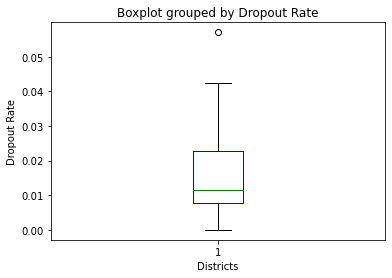

In [43]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
quartiles = florida_dropout_rate["Total Dropout Rate"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest with Matplotlib
plt.boxplot(florida_dropout_rate["Total Dropout Rate"], patch_artist=False,
                medianprops=dict(color="g"),boxprops=dict(color="b"))
plt.title("Boxplot grouped by Dropout Rate")
plt.ylabel('Dropout Rate')
plt.xlabel('Districts')
plt.show()

outliers = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] < lower_bound) | 
                                      (florida_dropout_rate["Total Dropout Rate"] > upper_bound)]

In [44]:
# Create a clean DataFrame by dropping the outlier.
clean_dropout_rate = florida_dropout_rate.loc[florida_dropout_rate["District Name"]!= "DESOTO"]
districts = clean_dropout_rate["District Name"]
clean_dropout_rate

,District Name,Total Dropout Rate
1,ALACHUA,0.028861
2,BAKER,0.009673
3,BAY,0.011826
4,BRADFORD,0.006283
5,BREVARD,0.008279
...,...,...
63,UNION,0.008097
64,VOLUSIA,0.009916
65,WAKULLA,0.012262
66,WALTON,0.022425


In [45]:
# mean = florida_dropout_rate["Total Dropout Rate"].mean()
# mean

In [46]:
# florida_dropout_rate_df = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > .011) & (florida_dropout_rate["Total Dropout Rate"] < .021)]

In [47]:
# florida_dropout_rate_df = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > mean - .004) & (florida_dropout_rate["Total Dropout Rate"] < mean + .004)]
# florida_dropout_rate_df

In [48]:
# median = florida_dropout_rate["Total Dropout Rate"].median()
# median

In [49]:
# florida_dropout_rate_median = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > median - .002) & (florida_dropout_rate["Total Dropout Rate"] < median + .003)]
# florida_dropout_rate_median

In [50]:
# florida_dropout_rate_median["Above/Below"] = np.where(florida_dropout_rate_median['Total Dropout Rate'] > median, 'Above', 'Below')
# florida_dropout_rate_median

In [51]:
# florida_dropout_rate_df_above = florida_dropout_rate_df.loc[florida_dropout_rate_df["Total Dropout Rate"] > median]
# districts_above = florida_dropout_rate_df_above["District Name"]
# districts_above

In [52]:
# florida_dropout_rate_df_below = florida_dropout_rate_df.loc[florida_dropout_rate_df["Total Dropout Rate"] < median]
# districts_below = florida_dropout_rate_df_below["District Name"]
# districts_below

# Demographics Analysis:

In [225]:
demo_combined_start = pd.merge(clean_fl_2014_21absents, rename_demographics, on="District Name")
demo_combined = pd.merge(demo_combined_start, lunch, on="District Name")
demo_combined_final = pd.merge(demo_combined, dropouts, on="District Name")
district_demographics = demo_combined_final[demo_combined_final["District Name"].isin(districts)]
district_demographics

,District #_x,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days,District #_y,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races_x,Female Total,Male Total,Total_x,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races_y,Total_y,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts
0,1,ALACHUA,32688,3101,0.094867,1,TOTAL,12837,10177,2483,1370,28,55,1726,14040,14636,28676,3625,8025,1293,282,12,27,987,6858,58,174,17,1,*,1,14,265
1,2,BAKER,5377,1005,0.186907,2,TOTAL,4096,572,92,20,2,14,141,2383,2554,4937,2256,523,63,10,1,11,114,1432,13,0,0,*,*,*,0,13
2,3,BAY,32074,4095,0.127674,3,TOTAL,19231,4229,1818,580,37,118,1548,13435,14126,27561,10473,3581,1316,316,27,82,1092,8214,65,16,8,2,*,0,4,95
3,4,BRADFORD,3820,703,0.184031,4,TOTAL,2269,727,67,25,12,6,80,1533,1653,3186,1526,649,57,7,10,6,69,1131,2,4,0,*,*,*,0,6
4,5,BREVARD,81394,5316,0.065312,5,TOTAL,45137,10607,9727,1508,92,166,5042,35062,37217,72279,18400,8368,6044,462,54,92,2913,17632,101,48,26,1,0,0,15,191
5,6,BROWARD,297615,25541,0.085819,6,TOTAL,61716,105778,81542,9410,339,790,6832,128938,137469,266407,21407,87683,50469,3963,222,419,3774,81121,235,754,235,16,1,4,15,1260
6,7,CALHOUN,2556,551,0.215571,7,TOTAL,1736,241,146,9,1,12,128,1133,1140,2273,1109,204,122,3,0,9,96,747,11,2,1,0,0,*,1,16
7,8,CHARLOTTE,18356,1368,0.074526,8,TOTAL,11445,1457,2209,235,21,47,717,7780,8351,16131,6681,1242,1782,153,12,36,527,5028,165,20,23,1,*,0,4,213
8,9,CITRUS,17130,1941,0.113310,9,TOTAL,12370,698,1113,274,20,52,596,7408,7715,15123,7911,558,866,109,8,37,473,4894,63,6,5,0,*,0,4,79
9,10,CLAY,39922,3565,0.089299,10,TOTAL,24293,5006,3799,925,114,76,1624,17277,18560,35837,9893,3127,2200,341,29,39,833,7897,97,27,2,0,0,0,5,131


In [228]:
# create a list of our conditions
conditions = [
    (district_demographics["Enrollments"] <= 15),
    (district_demographics["Enrollments"] > 15) & (district_demographics["Enrollments"] < 60),
    (district_demographics["Enrollments"] > 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
district_demographics['Enrollments Size'] = np.select(conditions, values)

/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# 21+ Absent Analysis

# Demographic Membership Analysis

# Lunches Analysis